# Notebook file for testing code without cluttering the .py files

import libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import local files:

In [ ]:
import bicyclemodel
from bicyclemodel import KinematicBicycleModel 
from bicyclemodel import RK4
from bicyclemodel import euler 

    * todo
    * draw workspace
    * draw vehicle
    * simulate vehicle 
    * use keys to control vehicle

In [ ]:
def testfunction_single(s):
    w = np.cos(s) - s + np.sqrt(s)
    return w

def testfunction_vector(s):
    #print(f"inside test function,s:{s}")
    x,y,z = s

    u = x**2 - z + 2.0*y
    v = y*z - x
    k = 3
    w = np.array([u,v,k])
    #print(f"inside test function,w:{w}")
    return w

timestep = 0.1
endtime = 300

H0  = 10
Hr = H0
d = 1
L =10
Ds2 = 20
Dr2 =100
g = 9.81
fr = 0.01 #friction factor
gam = 0
vel0 = np.sqrt((2*g*Hr*d)/(L*fr+d))
Hs0 = (Hr*d)/(L*fr+d)

def watersys(y): # system function

    H0  = 10
    Hr = H0
    d = 1
    L =10
    Ds2 = 20
    Dr2 =100
    g = 9.81
    fr = 0.01 #friction factor
    gam = 0

    H,v = y
    ve = np.sqrt(2*gam*g*H)
    dHs = (d/np.sqrt(Ds2))**2 * (v-ve)
    dv  = (g*(Hr-H) - (L/d)*(fr/2)*np.abs(v)*v)/L

    w = np.array([dHs,dv])

    return w


In [ ]:
y = np.array([3,4,5])
euler(testfunction_vector,y,0.1)

In [ ]:
#y = (3,4,5)
y = np.array([3,4,5]) 
RK4(testfunction_vector,y,0.1)

In [ ]:
outputarrayx = []
outputarrayy = []

ynew =  [Hs0,vel0]

yprev = ynew
abstime = 0

while True:
   
    yprev = ynew
    ynew = RK4(watersys,yprev,timestep)

   # append!(outputarrayx,ynew[1])
   # append!(outputarrayy,ynew[2])
    outputarrayx.append(ynew[0])
    outputarrayy.append(ynew[1])
    abstime = abstime + timestep
    if abstime > endtime:
        break
    
timearray = np.linspace(0,endtime,len(outputarrayx))

plt.plot(timearray,outputarrayx)
plt.plot(timearray,outputarrayy)
plt.show()

In [ ]:
car = KinematicBicycleModel()
dt = bicyclemodel.dt

abstime = 0
endtime = 300

output_rk4 = []

while True:
    
    

    if abstime < 30:
        throttle = 0.5
    else:
        throttle = 0
    steering = np.sin(abstime*0.01)*0.1
    output_rk4.append([car.x,car.y,car.yaw,car.v,throttle,steering,abstime])

    

    car.update(throttle,steering,method="RK4")

    abstime = abstime + dt
    if abstime > endtime:
        break


output_rk4 = np.asarray(output_rk4)

In [ ]:
car = KinematicBicycleModel()
dt = bicyclemodel.dt

abstime = 0
endtime = 300

output_euler = []

while True:
    
    

    if abstime < 30:
        throttle = 0.5
    else:
        throttle = 0
    steering = np.sin(abstime*0.01)*0.1
    output_euler.append([car.x,car.y,car.yaw,car.v,throttle,steering,abstime])

    

    car.update(throttle,steering,method="euler")

    abstime = abstime + dt
    if abstime > endtime:
        break


output_euler = np.asarray(output_euler)

In [ ]:
plt.plot(output_rk4[:,0],output_rk4[:,1],label='rk4')
plt.plot(output_euler[:,0],output_euler[:,1],label='euler')
plt.title('euler vs rk4 method')
plt.legend()
plt.show()

In [ ]:
from bicyclemodel import draw_rectangle
import numpy as np
import matplotlib.pyplot as plt
height=5
width=10
Xcenter=0
Ycenter=0
Yaw=0.1
plt.scatter((Xcenter),(Ycenter))
draw_rectangle(plt,width,height,Xcenter,Ycenter,Yaw,color='purple')
plt.plot((10,10,-10,-10,10),(10,-10,-10,10,10))
plt.xlim=(-10,10)
plt.ylim=(-10,10)
plt.grid()
plt.show()

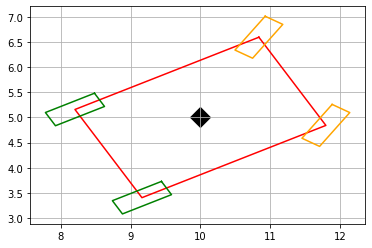

In [1]:
import bicyclemodel
import numpy as np
import matplotlib.pyplot as plt
from bicyclemodel import KinematicBicycleModel

car = KinematicBicycleModel(x=10.0,y=5.0,yaw=0.5)
#
#plt.plot((10,10,-10,-10,10),(10,-10,-10,10,10))

car.draw_car(plot=plt,delta=0.5)

plt.xlim=(-10,10)
plt.ylim=(-10,10)
plt.grid()
plt.show()

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from pandas import Series

results = pd.read_pickle("rrt_+_simulation_results.pkl")
list(results)

['simulation_number',
 'rectangle_inflation_param',
 'number_of_iterations',
 'RRT_solution_time',
 'collision_occured',
 'planner_successful',
 'out_of_time']

-------- Rectangle inflation parameter = 0 --------
Average solution time = 0.681 s
Collision-free paths found = 80.0 %
paths without collision = 8.33 %
Average number of RRT iterations = 930
Amount of successful paths without collision = 1

-------- Rectangle inflation parameter = 10 --------
Average solution time = 0.836 s
Collision-free paths found = 60.0 %
paths without collision = 0.0 %
Average number of RRT iterations = 1144
Amount of successful paths without collision = 0

-------- Rectangle inflation parameter = 20 --------
Average solution time = 0.882 s
Collision-free paths found = 64.29 %
paths without collision = 55.56 %
Average number of RRT iterations = 1272
Amount of successful paths without collision = 5

-------- Rectangle inflation parameter = 30 --------
Average solution time = 1.385 s
Collision-free paths found = 42.86 %
paths without collision = 100.0 %
Average number of RRT iterations = 1819
Amount of successful paths without collision = 6

-------- Rectangle infl

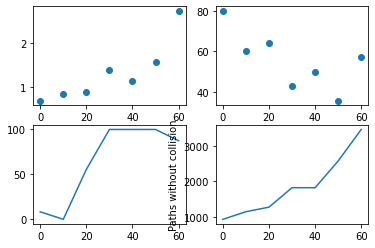

AttributeError: 'numpy.ndarray' object has no attribute 'set'

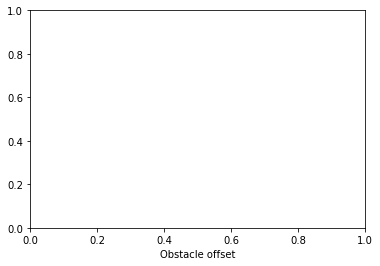

In [171]:
def extract(rectangle_inflation_param):
    inf0 = results.loc[results['rectangle_inflation_param']==rectangle_inflation_param]

    print(f'-------- Rectangle inflation parameter = {int(rectangle_inflation_param)} --------')

    average_t = sum(pd.Series.dropna(inf0['RRT_solution_time'])) / len(pd.Series.dropna(inf0['RRT_solution_time']))
    print(f'Average solution time = {round(average_t, 3)} s')

    planner_successful = sum(inf0['planner_successful'])/len(inf0['planner_successful'])*100
    print(f'Collision-free paths found = {round(planner_successful,2)} %')

    no_collision = (1-sum(pd.Series.dropna(inf0['collision_occured']))/len(pd.Series.dropna(inf0['collision_occured'])))*100
    print(f'paths without collision = {round(no_collision,2)} %')

    average_it = sum(pd.Series.dropna(inf0['number_of_iterations'])) / len(pd.Series.dropna(inf0['RRT_solution_time']))
    print(f'Average number of RRT iterations = {int(average_it)}')
    
    no_collision2 = inf0.loc[results['collision_occured']==False]
    amount = no_collision2.loc[no_collision2['rectangle_inflation_param']==rectangle_inflation_param]
    print(f'Amount of successful paths without collision = {len(amount)}')
    
    print()
    
    return average_t, planner_successful, no_collision, average_it, no_collision

average_ts = []
planner_successfuls = []
no_collisions = []
average_its = []
no_collisions = []

offsets = np.linspace(0,60,7)

for i in offsets: # 0, 10, ..., 60
    average_t, planner_successful, no_collision, average_it, no_collision = extract(i)
    average_ts.append(average_t)
    planner_successfuls.append(planner_successful)
    no_collisions.append(no_collision)
    average_its.append(average_it)


# plot
fig, ax = plt.subplots()

# ax.scatter(offsets, average_ts)
# plt.ylabel('Average solution time')


# ax.scatter(offsets, planner_successfuls)
# plt.ylabel('Collision-free paths found')

ax.plot(offsets, no_collisions)
plt.ylabel('Paths without collision')

# ax.plot(offsets, average_its)
# plt.show('Average number of RRT iterations')


plt.xlabel('Obstacle offset')
ax.set(xlim=(0, 60))



# plt.plot(x, y)
# plt.plot(y, x, label = "line 2")
# plt.legend()


# print(results)

# 10x20
# 19 max afmeting auto middelpunt tot hoek

